# EL universal Scrapper

In [43]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import lxml
from tqdm import tqdm

In [44]:
url = 'https://www.eluniversal.com.mx'
universal = requests.get(url)

In [45]:
universal.status_code

200

In [46]:
universal.headers

{'Date': 'Wed, 09 Dec 2020 05:02:13 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': '__cfduid=d4dbd02ff1b6b896f3d847f189079089b1607490133; expires=Fri, 08-Jan-21 05:02:13 GMT; path=/; domain=.eluniversal.com.mx; HttpOnly; SameSite=Lax; Secure, __cfruid=5b1a88c0ee071ea27a0cd79df88f8eb663fb463b-1607490133; path=/; domain=.eluniversal.com.mx; HttpOnly; Secure; SameSite=None', 'X-Content-Type-Options': 'nosniff', 'X-Powered-By': 'PHP/5.6.40', 'X-Drupal-Cache': 'HIT', 'Content-Language': 'es', 'X-Frame-Options': 'SAMEORIGIN', 'X-Generator': 'Drupal 7 (http://drupal.org)', 'Link': '<http://www.eluniversal.com.mx/sites/all/themes/universal/images/default600x315px.jpg>; rel="image_src",<https://www.eluniversal.com.mx/>; rel="canonical",<https://www.eluniversal.com.mx/>; rel="shortlink"', 'Cache-Control': 'public, max-age=300', 'Last-Modified': 'Wed, 09 Dec 2020 04:59:49 GMT', 'Expires': 'Wed, 09 Dec 2020 05:07:13 GMT',

In [47]:
universal.request.headers

{'User-Agent': 'python-requests/2.25.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [48]:
soup = BeautifulSoup(universal.text, 'html.parser')

In [49]:
soup.prettify()

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"\n  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">\n<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:og="http://ogp.me/ns#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:video="http://ogp.me/ns/video#">\n <head profile="http://www.w3.org/1999/xhtml/vocab">\n  <meta content="on" http-equiv="x-dns-prefetch-control"/>\n  <meta content="163316950407128" property="fb:app_id"/>\n  <link href="https://fonts.googleapis.com&amp;display=swap" rel="preload"/>\n  <link href="https://fonts.gstatic.com&amp;display=swap" rel="preload"/>\n  <link crossorigin="" href="https://use.fontawesome.com/" rel="preconnect"/>\n  <link href="https://use.fontawesome.com/" rel="dns-prefetch"/>\n  <link crossorigin="" href="https://connect.facebook.net/" rel="preconnect"/>\n  <link href="https://connect.facebook.net/" rel="dns-prefet

In [50]:
nav_bar = soup.find('ul', attrs={'class':'links inline'}).find_all('li')
nav_bar

[<li class="listado"><a href="/minuto-x-minuto">MxM</a></li>,
 <li class="listado"><a href="/videos">Videos</a></li>,
 <li class="listado"><a href="/galerias" rel="nofollow">Fotos</a></li>,
 <li class="listado"><a href="/especiales">Especiales</a></li>]

In [51]:
nav_bar_MXM = nav_bar[0]
nav_bar_MXM

<li class="listado"><a href="/minuto-x-minuto">MxM</a></li>

In [52]:
nav_bar_MXM.a.get_text()

'MxM'

In [53]:
nav_bar_MXM_link = nav_bar_MXM.a.get('href')
nav_bar_MXM_link

'/minuto-x-minuto'

In [54]:
#list comprenhension
link_nav_bar = [url + link_nvbar.a.get('href') for link_nvbar in nav_bar]
link_nav_bar

['https://www.eluniversal.com.mx/minuto-x-minuto',
 'https://www.eluniversal.com.mx/videos',
 'https://www.eluniversal.com.mx/galerias',
 'https://www.eluniversal.com.mx/especiales']

### Obteniendo listado de notas

In [55]:
minuto_minuto = requests.get(link_nav_bar[0])
minuto_minuto

<Response [200]>

In [56]:
soup_mxm = BeautifulSoup(minuto_minuto.text, 'html.parser')
print(soup_mxm.prettify())

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN"
  "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html dir="ltr" version="XHTML+RDFa 1.0" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml" xmlns:article="http://ogp.me/ns/article#" xmlns:book="http://ogp.me/ns/book#" xmlns:og="http://ogp.me/ns#" xmlns:profile="http://ogp.me/ns/profile#" xmlns:video="http://ogp.me/ns/video#">
 <head profile="http://www.w3.org/1999/xhtml/vocab">
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <meta content="163316950407128" property="fb:app_id"/>
  <link href="https://fonts.googleapis.com&amp;display=swap" rel="preload"/>
  <link href="https://fonts.gstatic.com&amp;display=swap" rel="preload"/>
  <!--[if IE]><![endif]-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="https://www.eluniversal.com.mx/sites/all/themes/eluniversal/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <meta content="" name="cXenseParse:url"/>
  <meta con

In [57]:
article_list = soup_mxm.find('div', attrs={'class':'view-content'})
article_list

<div class="view-content">
<article class="ce9-Tipo3MinxMin">
<div class="ce9-Tipo3MinxMin_Contenedor1">
<div class="ce9-Tipo3MinxMin_ContenedorReloj">
<div class="ce9-Tipo3MinxMin_Reloj">
<span class="far fa-clock"></span>
</div>
<p class="ce9-Tipo3MinxMin_Hora">
22:46 </p>
</div>
</div>
<div class="ce9-Tipo3MinxMin_Texto">
<p class="ce9-Tipo3MinxMin_Seccion seccion-15"><a href="/deportes">Universal Deportes</a></p>
<h2 class="ce9-Tipo3MinxMin_Titulo"><a href="https://www.eluniversal.com.mx/universal-deportes/futbol/joao-maleck-podria-quedar-en-libertad-en-cualquier-momento">Joao Maleck podría quedar en libertad en cualquier momento</a></h2>
</div>
</article>
<article class="ce9-Tipo3MinxMin">
<div class="ce9-Tipo3MinxMin_Contenedor1">
<div class="ce9-Tipo3MinxMin_ContenedorReloj">
<div class="ce9-Tipo3MinxMin_Reloj">
<span class="far fa-clock"></span>
</div>
<p class="ce9-Tipo3MinxMin_Hora">
22:38 </p>
</div>
</div>
<div class="ce9-Tipo3MinxMin_Texto">
<p class="ce9-Tipo3MinxMin_Secc

In [58]:
article_content = article_list.find_all('h2', attrs={'class':'ce9-Tipo3MinxMin_Titulo'})
article_a_href = [article_href.a.get('href') for article_href in article_content]
article_a_href

['https://www.eluniversal.com.mx/universal-deportes/futbol/joao-maleck-podria-quedar-en-libertad-en-cualquier-momento',
 'https://www.eluniversal.com.mx/universal-deportes/futbol-americano/zuerlein-le-quita-esperanzas-cowboys-al-fallar-tres-patadas',
 'https://www.eluniversal.com.mx/metropoli/edomex/edomex-prohibe-usar-vapeadores-en-espacios-libres-de-humo-de-tabaco',
 'https://www.eluniversal.com.mx/universal-deportes/futbol/liga-mx-america-llama-mentiroso-paul-aguilar',
 'https://www.eluniversal.com.mx/nacion/impugna-amlo-medida-cautelar-del-ine-para-hablar-sobre-el-proceso-electoral',
 'https://www.eluniversal.com.mx/universal-deportes/futbol/america-roger-martinez-y-andres-ibarguen-se-van',
 'https://www.eluniversal.com.mx/universal-deportes/futbol/en-leon-no-se-sienten-con-el-titulo-en-la-mano',
 'https://www.eluniversal.com.mx/mundo/norcorea-amenaza-seul-por-dudar-que-tiene-cero-casos-de-covid-19',
 'https://www.eluniversal.com.mx/nacion/sre-mexico-no-ha-cambiado-posicion-respect

In [59]:
url1_nota = article_a_href[0]
url1_nota

'https://www.eluniversal.com.mx/universal-deportes/futbol/joao-maleck-podria-quedar-en-libertad-en-cualquier-momento'

In [60]:
try:
    nota = requests.get(url1_nota)
    if nota.status_code == 200:
        s_note = BeautifulSoup(nota.text, 'html.parser')
        #Exraemos el titulo
        titulo = s_note.find('h1', attrs={'class':'h1'})
        print(titulo.get_text())
        #Extraemos subtitulo
        subtitle = s_note.find('h2', attrs={'class':'h2'})
        print(subtitle.get_text())
        #extraemos fecha
        fecha = s_note.find('span', attrs={'class':'ce12-DatosArticulo_ElementoFecha'})
        print(fecha.text)
    else:
        print('but')
except Exception as e:
    print(f'Se genero el siguiente error: {e}')

Joao Maleck podría quedar en libertad en cualquier momento
El abogado del jugador mexicano ha pagado una fianza de más de 3 millones de pesos
 08/12/2020


In [61]:
cuerpo = s_note.find('div', attrs={'class':'field field-name-body field-type-text-with-summary field-label-hidden'})
cuerpo_texto = cuerpo.find('p').text
cuerpo_texto

'Joao Maleck podría quedar en libertad en cualquier momento.'

In [62]:
image_container = s_note.find('figure', attrs={'class':'contenedor-ImagenArticulo'})

In [63]:
if image_container:
    print("Si hay")
else:
    print("bto")

Si hay


In [64]:
image = image_container.find('img')
image

<img alt="Maleck podría quedar en libertad en cualquier momento" src="https://www.eluniversal.com.mx/sites/default/files/2020/12/08/maleck.jpg"/>

In [65]:
image_url = image.get('src')
image_url

'https://www.eluniversal.com.mx/sites/default/files/2020/12/08/maleck.jpg'

In [66]:
image_url_request = requests.get(image_url)
image_url_request.status_code

200

In [67]:
from IPython.display import Image

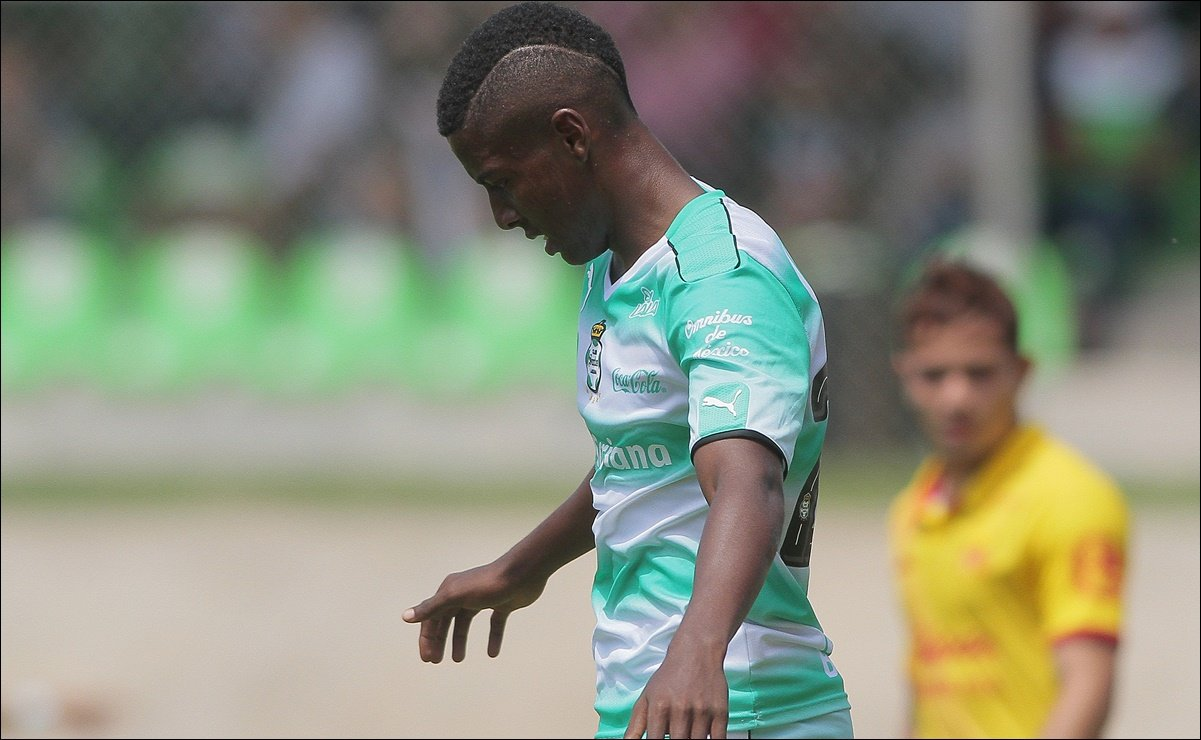

In [68]:
Image(image_url_request.content)

In [69]:
def obtener_info_nota(soup_nota):
    ret_dict = {}
    
    #Exraemos el titulo
    titulo = soup_nota.find('h1', attrs={'class':'h1'})
    if titulo:
        ret_dict['titulo'] = titulo.get_text()
    else:
        ret_dict['titulo'] = None
    #Extraemos subtitulo
    subtitle = soup_nota.find('h2', attrs={'class':'h2'})
    if subtitle:
        ret_dict['subtitle'] = subtitle.get_text()
    else:
        ret_dict['subtitle'] = None
    #extraemos fecha
    fecha = soup_nota.find('span', attrs={'class':'ce12-DatosArticulo_ElementoFecha'})
    if fecha:
        ret_dict['fecha'] = fecha.text
    else:
        ret_dict['fecha'] = None
    
    #Extraemos la img
    image_container = soup_nota.find('figure', attrs={'class':'contenedor-ImagenArticulo'})
    if image_container:
        image = image_container.find('img')
        image_url = image.get('src')
        try:
            image_url_request = requests.get(image_url)
            if image_url_request.status_code == 200:
                ret_dict['imagen'] = image_url_request.content
            else:
                ret_dict['imagen'] = None
        except:
            print('No se pudo obtener la imagen')
    else:
        print('No se encontro media')
    #Extraemos cuerpo de la nota
    cuerpo = soup_nota.find('div', attrs={'class':'field field-name-body field-type-text-with-summary field-label-hidden'})
    cuerpo_texto = cuerpo.find('p')
    if cuerpo_texto:
        ret_dict['cuerpo'] = cuerpo_texto.text
    else:
        ret_dict['cuerpo'] = None
    return ret_dict

In [79]:
def scrape_nota(url):
    try:
        nota = requests.get(url)
    except Exception as e:
        print(f'Error escrapeando la URL {e}')
        return None
    
    if nota.status_code != 200:
        print(f'Error obteniendo nota {e}')
        print(f'Status code: {nota.status_code}')
        return None
    
    s_nota = BeautifulSoup(nota.text, 'html.parser')
    ret_dict = obtener_info_nota(s_nota)
    ret_dict['url'] = url
    
    return ret_dict

In [71]:
url1_nota

'https://www.eluniversal.com.mx/universal-deportes/futbol/joao-maleck-podria-quedar-en-libertad-en-cualquier-momento'

In [81]:
scrape_nota(url1_nota)

{'titulo': 'Joao Maleck podría quedar en libertad en cualquier momento',
 'subtitle': 'El abogado del jugador mexicano ha pagado una fianza de más de 3 millones de pesos',
 'fecha': ' 08/12/2020',
 'imagen': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x02\xe4\x04\xb1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\x08

In [82]:
article_a_href

['https://www.eluniversal.com.mx/universal-deportes/futbol/joao-maleck-podria-quedar-en-libertad-en-cualquier-momento',
 'https://www.eluniversal.com.mx/universal-deportes/futbol-americano/zuerlein-le-quita-esperanzas-cowboys-al-fallar-tres-patadas',
 'https://www.eluniversal.com.mx/metropoli/edomex/edomex-prohibe-usar-vapeadores-en-espacios-libres-de-humo-de-tabaco',
 'https://www.eluniversal.com.mx/universal-deportes/futbol/liga-mx-america-llama-mentiroso-paul-aguilar',
 'https://www.eluniversal.com.mx/nacion/impugna-amlo-medida-cautelar-del-ine-para-hablar-sobre-el-proceso-electoral',
 'https://www.eluniversal.com.mx/universal-deportes/futbol/america-roger-martinez-y-andres-ibarguen-se-van',
 'https://www.eluniversal.com.mx/universal-deportes/futbol/en-leon-no-se-sienten-con-el-titulo-en-la-mano',
 'https://www.eluniversal.com.mx/mundo/norcorea-amenaza-seul-por-dudar-que-tiene-cero-casos-de-covid-19',
 'https://www.eluniversal.com.mx/nacion/sre-mexico-no-ha-cambiado-posicion-respect

notas = []
for link in article_a_href:
    try:
        r = requests.get(link)
        if r.status_code == 200:
            soup = BeautifulSoup(r.text, 'html.parser')
            notas.extend(obtener_info_nota(soup))
        else:
            print('no se pudo obtener la sección', link)
    except:
        print('No se pudo obtener la section', link)
        

In [85]:
data = []
for i, nota in enumerate(article_a_href):
    print(f'Scrapeando la nota {i}/{len(article_a_href)}')
    data.append(scrape_nota(nota))

Scrapeando la nota 0/10
Scrapeando la nota 1/10
Scrapeando la nota 2/10
Scrapeando la nota 3/10
Scrapeando la nota 4/10
Scrapeando la nota 5/10
Scrapeando la nota 6/10
Scrapeando la nota 7/10
Scrapeando la nota 8/10
Scrapeando la nota 9/10


In [86]:
len(data)

10

In [87]:
import pandas as pd

In [88]:
df = pd.DataFrame(data)
df.head()

,titulo,subtitle,fecha,imagen,cuerpo,url
0,Joao Maleck podría quedar en libertad en cualq...,El abogado del jugador mexicano ha pagado una ...,08/12/2020,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,Joao Maleck podría quedar en libertad en cualq...,https://www.eluniversal.com.mx/universal-depor...
1,Zuerlein le quita esperanzas a Cowboys al fall...,El head coach de Dallas sabía que acababan de ...,08/12/2020,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"Iracundo, Mike McCarthy se olvidó del frío gen...",https://www.eluniversal.com.mx/universal-depor...
2,Edomex prohíbe usar vapeadores en espacios lib...,"Por unanimidad, el Congreso mexiquense aprobó ...",08/12/2020,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"Toluca, Méx.- El Congreso del Estado de México...",https://www.eluniversal.com.mx/metropoli/edome...
3,En el América llaman mentiroso a Paul Aguilar,"""le pegó el tema de no querer salir, no lo asi...",08/12/2020,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,"Paul Aguilar, quien se quejó de la falta de ap...",https://www.eluniversal.com.mx/universal-depor...
4,Impugna AMLO medida cautelar del INE para habl...,El órgano electoral aprobó imponer medidas cau...,08/12/2020,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,El presidente Andrés Manuel López Obrador impu...,https://www.eluniversal.com.mx/nacion/impugna-...
